In this Lab, we will practice in Numpy, Pandas and simple linear regression. We will use the dataset mtcars.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

Use the dataset cars.csv 

In [10]:
cars_df = pd.read_csv(filepath_or_buffer='cars.csv')
cars_df.head()

,make,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


1.Convert the column mpg to numpy array and print the array. (5)

In [11]:
 mpg =np.array(np.genfromtxt('cars.csv',  delimiter=',', skip_header=1, usecols=(2)))
 print(mpg)

[21.  21.  22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 17.8 16.4 17.3 15.2
 10.4 10.4 14.7 32.4 30.4 33.9 21.5 15.5 15.2 13.3 19.2 27.3 26.  30.4
 15.8 19.7 15.  21.4]


2. calculate how many cars' mpg is under 15. (5)

In [134]:
check = (mpg < 15)
count_under_15 = np.count_nonzero(check)
print(count_under_15)

5


3.Show the models that their mpg is under 15. (10)

In [135]:
mpg_under_15 = cars_df["mpg"] < 15
models_under_15 = cars_df.loc[mpg_under_15, "model"]
print(models_under_15)

6              Duster 360
14     Cadillac Fleetwood
15    Lincoln Continental
16      Chrysler Imperial
23             Camaro Z28
Name: model, dtype: object


4.Show how many unique make does the dataset have and print them out. (10)

In [136]:
unique_cars = cars_df['make'].unique()
print(len(unique_cars))
print(unique_cars)

22
['Mazda' 'Datsun' 'Hornet' 'Valiant' 'Duster' 'Merc' 'Cadillac' 'Lincoln'
 'Chrysler' 'Fiat' 'Honda' 'Toyota' 'Dodge' 'AMC' 'Camaro' 'Pontiac'
 'Porsche' 'Lotus' 'Ford' 'Ferrari' 'Maserati' 'Volvo']


5.Show how many cars each make has. (10)

In [137]:
make_appearance = cars_df["make"].value_counts()
print(make_appearance)

make
Merc        7
Mazda       2
Fiat        2
Toyota      2
Hornet      2
Duster      1
Camaro      1
Maserati    1
Ferrari     1
Ford        1
Lotus       1
Porsche     1
Pontiac     1
AMC         1
Valiant     1
Dodge       1
Datsun      1
Honda       1
Chrysler    1
Lincoln     1
Cadillac    1
Volvo       1
Name: count, dtype: int64


6.Creat the scatter plot with X axis is hp and Y axis is mpg.(10)

<Axes: xlabel='hp', ylabel='mpg'>

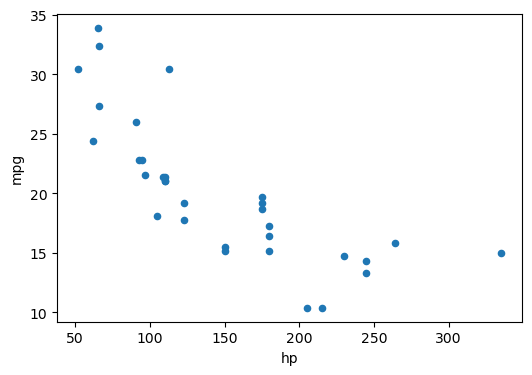

In [138]:
cars_df.plot(kind = "scatter", x = "hp", y = "mpg", figsize = (6,4))

7.Train the linear model using hp as variable and MPG as target and print $\theta_{0}$, $\theta_{1}$ (10) 

(hint: use the fomula: $\theta = (\mathrm{X}^{T}\mathrm{X})^{-1}\mathrm{X}^{T}\mathrm{y}$)

In [139]:
hp = cars_df["hp"]
a = np.ones((hp.shape[0],1))
x = np.hstack((a, hp.values.reshape(-1,1)))
y = cars_df["mpg"]
theta = np.matmul(np.linalg.inv(np.matmul(x.T,x)), np.matmul(x.T,y))
theta

array([30.09886054, -0.06822828])

8.Plat the scatter plot again with the line showing the linear model.(10)

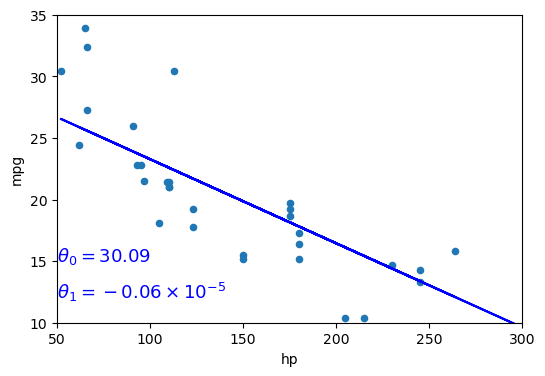

In [140]:
cars_df.plot(kind = 'scatter', x = 'hp', y = 'mpg', figsize=(6,4))
plt.axis([50, 300, 10, 35])
X = np.linspace(0, 500, 5)
plt.plot(x,theta[0] + theta[1]*x, "b") 
plt.text(50, 15, r"$\theta_0 = 30.09$", fontsize=13, color="b")
plt.text(50, 12, r"$\theta_1 = -0.06 \times 10^{-5}$", fontsize=13, color="b") 
plt.show()

9.Random choose 3 datapoint from the dataset, use the linear model to predict the MPG with HP, show the difference between predict value and real value. (10)

In [141]:
value_93 = 93
predicted_value_for_93 = theta[0] + theta[1] * value_93
print('The predicted value for 93: ',predicted_value_for_93 )
print('The difference or cost function is : ',predicted_value_for_93 - 22.8 )

value_123 = 123
predicted_value_for_123 = theta[0] + theta[1] * value_123
print('The predicted value for 123: ',predicted_value_for_123 )
print('The difference or cost function is : ',predicted_value_for_123 - 17.8 )

value_175 = 175
predicted_value_for_175 = theta[0] + theta[1] * value_175
print('The predicted value for 175: ',predicted_value_for_175 )
print('The difference or cost function is : ',predicted_value_for_175 - 19.2 )


The predicted value for 93:  23.753630678967042
The difference or cost function is :  0.9536306789670412
The predicted value for 123:  21.70678233682014
The difference or cost function is :  3.9067823368201395
The predicted value for 175:  18.158911877098838
The difference or cost function is :  -1.0410881229011615


10.Explain the why some differences are large, some are not(10)

In [142]:
print("Some differences are larger because this model is not 100% perfect, therefore it is more precise for some datapoints that it is for other data points")

Some differences are larger because this model is not 100% perfect, therefore it is more precise for some datapoints that it is for other data points


11.Find $\mathrm{R}^{2}$ and use $\mathrm{R}^{2}$ to explain whether the model is accurate.(10)

In [8]:
x = sm.add_constant(cars_df['hp'])
model = sm.OLS(cars_df['mpg'], x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     45.46
Date:                Thu, 25 Jan 2024   Prob (F-statistic):           1.79e-07
Time:                        22:50:11   Log-Likelihood:                -87.619
No. Observations:                  32   AIC:                             179.2
Df Residuals:                      30   BIC:                             182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0989      1.634     18.421      0.0

In [ ]:
print("From the summary, the given R-Squared is 0.602, this means that 60.2% of the variation in mpg can be explained linear regression liine of mpg on hp", )